In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [11]:
data = pd.read_csv('../kathleen/features.csv',index_col=0)

In [13]:
pd.set_option('max_columns', None)
# pd.reset_option(“max_columns”)

In [60]:
# data

In [17]:
data['bert-gs_scores'].describe()

count    2100.000000
mean       -0.171621
std         0.682459
min        -1.914418
25%        -0.659403
50%        -0.153473
75%         0.326316
max         1.581189
Name: bert-gs_scores, dtype: float64

In [18]:
data['Grandstanding_ind'] = np.where(data['bert-gs_scores']>=1,1,0)

In [58]:
# data

In [22]:
data.describe()

,word_count,start,end,duration,log_mean_pitch,log_stdev_pitch,rate_of_change_log_variance,onset_count,onset_rate,onset_time_diff_mean,onset_time_diff_var,onset_strength_mean,onset_strength_seg_var,onset_strength_seg_std,onset_delta_abs_mean,onset_delta_var,bert-gs_scores,Grandstanding_ind
count,2100.000000,2100.000000,2100.000000,2100.000000,2083.000000,2083.000000,2083.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,89.270000,2435.788133,2471.167952,35.379819,5.392156,0.252176,0.001675,103.370476,3.072755,0.329917,0.098468,0.782963,2.333696,1.484643,0.143437,0.063113,-0.171621,0.036190
std,51.231736,1511.991382,1512.338166,21.174534,0.370102,0.183147,0.000830,64.303161,0.996652,0.108919,0.071000,0.172111,0.997000,0.359991,0.033660,0.027439,0.682459,0.186808
min,40.000000,117.960000,141.440000,8.440000,4.184086,0.004621,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.914418,0.000000
25%,55.000000,1156.340000,1187.670000,21.336250,5.171288,0.143366,0.001147,64.000000,2.451407,0.263837,0.052760,0.687863,1.690566,1.300217,0.126752,0.044927,-0.659403,0.000000
50%,73.000000,2305.107500,2345.472500,29.155000,5.403509,0.200708,0.001612,88.000000,3.004978,0.320000,0.080771,0.786383,2.144242,1.464323,0.142786,0.058742,-0.153473,0.000000
75%,107.000000,3508.350000,3543.247500,42.685000,5.552467,0.294953,0.002112,124.000000,3.637388,0.390299,0.126934,0.901039,2.793997,1.671525,0.161770,0.078097,0.326316,0.000000
max,496.000000,6934.370000,6965.025000,162.020000,7.634803,1.117592,0.007298,733.000000,6.873315,1.031680,0.833887,1.191632,7.780046,2.789273,0.247009,0.195020,1.581189,1.000000


In [26]:
data['duration'].mean()

35.379819047285714

In [27]:
data['duration_ind'] = np.where(data['duration']>data['duration'].mean(),1,0)

In [29]:
data['duration_ind'] = np.where(data['duration']>data['duration'].mean(),1,0)
data['log_mean_pitch_ind'] = np.where(data['log_mean_pitch']>data['log_mean_pitch'].mean(),1,0)
data['log_stdev_pitch_ind'] = np.where(data['log_stdev_pitch']>data['log_stdev_pitch'].mean(),1,0)
data['rate_of_change_log_variance_ind'] = np.where(data['rate_of_change_log_variance']>data['rate_of_change_log_variance'].mean(),1,0)
data['onset_count_ind'] = np.where(data['onset_count']>data['onset_count'].mean(),1,0)
data['onset_rate_ind'] = np.where(data['onset_rate']>data['onset_rate'].mean(),1,0)
data['onset_time_diff_mean_ind'] = np.where(data['onset_time_diff_mean']>data['onset_time_diff_mean'].mean(),1,0)
data['onset_time_diff_var_ind'] = np.where(data['onset_time_diff_var']>data['onset_time_diff_var'].mean(),1,0)
data['onset_strength_mean_ind'] = np.where(data['onset_strength_mean']>data['onset_strength_mean'].mean(),1,0)
data['onset_strength_seg_var_ind'] = np.where(data['onset_strength_seg_var']>data['onset_strength_seg_var'].mean(),1,0)
data['onset_strength_seg_std_ind'] = np.where(data['onset_strength_seg_std']>data['onset_strength_seg_std'].mean(),1,0)
data['onset_delta_abs_mean_ind'] = np.where(data['onset_delta_abs_mean']>data['onset_delta_abs_mean'].mean(),1,0)
data['onset_delta_var_ind'] = np.where(data['onset_delta_var']>data['onset_delta_var'].mean(),1,0)







In [59]:
# data

In [40]:
new_data = data.iloc[:, -14:]

In [42]:
X = new_data.loc[:, new_data.columns != 'Grandstanding_ind']
y = new_data.loc[:, new_data.columns == 'Grandstanding_ind']

In [45]:
os = SMOTE(random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Grandstanding_ind'])



In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y.values.ravel())

LogisticRegression()

In [54]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(os_data_X, os_data_y)))

Accuracy of logistic regression classifier on test set: 0.71


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

[[279 128]
 [  8   5]]


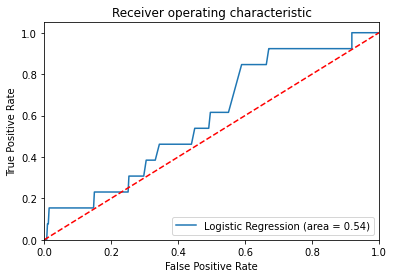

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
print(logreg.coef_)

[[ 0.26141932 -1.08419411 -0.18050962  0.05601148 -0.4085247  -2.03959021
  -0.79641717 -0.47116505 -0.95085114  2.73106231  0.05036004 -1.24107907
  -0.74870184]]
